In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_csv('runs.csv')
df.head(2)

,Run ID,Name,acc,loss,val_acc,val_loss,DATA_AUGUMENTATION,Saved Model Name,augumentation,per_channel_normalization,...,histogram_equalization,mean_per_channel,Test performance,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,968240f346854dd6a92ab834791f9040,BS + AUG + CC(5),0.939332,0.143100,0.950955,0.123547,True,src/models/UNet_model_256x256_14092021-193014.h5,True,False,...,False,NaN,"[('loss', 0.1378202885389328), ('acc', 0.94506...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8da0558405d1416b8f1e20e7e8b474ab,BS + AUG + HEQ,0.937776,0.147966,0.955565,0.111283,True,src/models/UNet_model_256x256_14092021-184239.h5,True,False,...,True,NaN,"[('loss', 0.12748126685619354), ('acc', 0.9498...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

raws  = df['Test performance'][0:13]
print(raws)
import ast 

test_accuracies = list()
for i in range(len(raws)):
    x = ast.literal_eval(raws[i])
    test_accuracies.append(x[1][1])
test_accuracies


0     [('loss', 0.1378202885389328), ('acc', 0.94506...
1     [('loss', 0.12748126685619354), ('acc', 0.9498...
2     [('loss', 0.13381905853748322), ('acc', 0.9476...
3     [('loss', 0.12721456587314606), ('acc', 0.9501...
4     [('loss', 0.1474209427833557), ('acc', 0.94489...
5     [('loss', 0.17507420480251312), ('acc', 0.9324...
6     [('loss', 0.18018466234207153), ('acc', 0.9284...
7     [('loss', 0.12962566316127777), ('acc', 0.9488...
8     [('loss', 0.15125109255313873), ('acc', 0.9398...
9     [('loss', 0.12954506278038025), ('acc', 0.9487...
10    [('loss', 0.12854617834091187), ('acc', 0.9493...
11    [('loss', 0.29785585403442383), ('acc', 0.8972...
12    [('loss', 0.12309819459915161), ('acc', 0.9515...
Name: Test performance, dtype: object


[0.9450674057006836,
 0.9498485922813416,
 0.9476662278175354,
 0.950149655342102,
 0.9448909759521484,
 0.9324745535850525,
 0.9284594655036926,
 0.9488648772239685,
 0.9398307800292969,
 0.948745846748352,
 0.9493865966796875,
 0.8972094655036926,
 0.9515164494514465]

In [4]:
len(df.loc[0:12])

13

In [5]:
df = df.loc[0:12]
df['test_acc'] = test_accuracies

In [6]:

raws  = df['Test performance'][0:13]
print(raws)
import ast 

test_precision = list()
for i in range(len(raws)):
    x = ast.literal_eval(raws[i])
    test_precision.append(x[2][1])
test_precision

0     [('loss', 0.1378202885389328), ('acc', 0.94506...
1     [('loss', 0.12748126685619354), ('acc', 0.9498...
2     [('loss', 0.13381905853748322), ('acc', 0.9476...
3     [('loss', 0.12721456587314606), ('acc', 0.9501...
4     [('loss', 0.1474209427833557), ('acc', 0.94489...
5     [('loss', 0.17507420480251312), ('acc', 0.9324...
6     [('loss', 0.18018466234207153), ('acc', 0.9284...
7     [('loss', 0.12962566316127777), ('acc', 0.9488...
8     [('loss', 0.15125109255313873), ('acc', 0.9398...
9     [('loss', 0.12954506278038025), ('acc', 0.9487...
10    [('loss', 0.12854617834091187), ('acc', 0.9493...
11    [('loss', 0.29785585403442383), ('acc', 0.8972...
12    [('loss', 0.12309819459915161), ('acc', 0.9515...
Name: Test performance, dtype: object


[0.8803917169570923,
 0.9002598524093628,
 0.9277320504188538,
 0.8971036672592163,
 0.8941459655761719,
 0.870057225227356,
 0.9088621735572815,
 0.8990259170532227,
 0.8788446187973022,
 0.9031609892845154,
 0.9175369143486023,
 0.8895692229270935,
 0.9099620580673218]

In [7]:
df['test_prec'] = test_precision

In [8]:
df1 = df[['Name', 'acc', 'val_acc', 'test_acc', 'test_prec', 'Saved Model Name']]
df1.sort_values(['test_acc', 'test_prec'], ascending=False)

,Name,acc,val_acc,test_acc,test_prec,Saved Model Name
12,Baseline,0.935714,0.953622,0.951516,0.909962,src/models/UNet_model_256x256_14092021-155128.h5
3,BS + AUG + HEQ + PCN,0.940812,0.953636,0.950150,0.897104,src/models/UNet_model_256x256_14092021-181638.h5
1,BS + AUG + HEQ,0.937776,0.955565,0.949849,0.900260,src/models/UNet_model_256x256_14092021-184239.h5
10,BS + HEQ,0.938500,0.952377,0.949387,0.917537,src/models/UNet_model_256x256_14092021-161150.h5
7,BS + GAUS,0.936023,0.953168,0.948865,0.899026,src/models/UNet_model_256x256_14092021-171213.h5
9,BS + AUG,0.936283,0.953418,0.948746,0.903161,src/models/UNet_model_256x256_14092021-162556.h5
2,BS + AUG + HEQ,0.935887,0.952842,0.947666,0.927732,src/models/UNet_model_256x256_14092021-182610.h5
0,BS + AUG + CC(5),0.939332,0.950955,0.945067,0.880392,src/models/UNet_model_256x256_14092021-193014.h5
4,BS + AUG + PCN,0.932011,0.952815,0.944891,0.894146,src/models/UNet_model_256x256_14092021-180210.h5
8,BS + CC(5),0.934409,0.944711,0.939831,0.878845,src/models/UNet_model_256x256_14092021-165746.h5


In [42]:
import tensorflow as tf
def jaccard_index(y_true, y_pred, smooth=0.0001):
    with tf.device('/device:GPU:0'):
        y_pred = tf.math.greater_equal(y_pred, 0.5)
        y_true = tf.math.greater_equal(y_true, 0.5)

        print(tf.reduce_sum(tf.cast(y_true, tf.int8)) )

        intersection = tf.math.reduce_sum( tf.cast(tf.math.logical_and(y_pred, y_true), tf.int8))
        union = tf.math.reduce_sum( tf.cast(tf.math.logical_or(y_pred, y_true), tf.int8))
        print('intersection:', intersection,'union:', union)
        jac_index = intersection /  union
        
    return jac_index

In [10]:
a = tf.constant([1,1,0,1], tf.float16)
b = tf.constant([1,1,1,1], tf.float16)

jaccard_index(a,b)

<tf.Tensor: shape=(), dtype=float32, numpy=0.75>

In [11]:
import train_gpu as train 
import cv2 

jaccards = list()
df1 = df1.sort_values(['Name'], ascending=True)
for run in range(len(df1)):
    row = df1.iloc[run]
    print(row['Name'])

    tr = train.Trainer(debug_mode=True)
    for feature in ['BS', 'CC', 'GAUS', 'AUG', 'HEQ', 'PCN']:

        if feature in row['Name']:
            print(feature)

            if feature == 'CC':
                tr.preprocessing_parameters['connected_components'] = True
            if feature == 'GAUS':
                tr.preprocessing_parameters['gaussian_blur'] = True
            if feature == 'AUG':
                tr.preprocessing_parameters['augumentation'] = True
            if feature == 'HEQ':
                tr.preprocessing_parameters['histogram_equalization'] = True
            if feature == 'PCN':
                tr.preprocessing_parameters['per_channel_normalization'] = True



    tr.load_data()
    tr.build_model()
    tr.model.load_weights(row['Saved Model Name'])
    results = tr.model.predict(tr.data['test_images'])

    jacc_sum = 0
    for res,mask in zip(results, tr.data['test_masks']):
        
        d = mask > 0.5
        r = res
        t, r = cv2.threshold( np.array(r*255, dtype='uint8'), 0, 255, cv2.THRESH_OTSU)
        r = r / 255
        r = r > 0.5

        r = r.flatten()
        d = d.flatten()

        inter = np.logical_and(d,r).sum()
        union = np.logical_or(d,r).sum()



        jacc_sum += inter / union 

    mean_jaccard_index = jacc_sum / len(results)
    print(mean_jaccard_index)
    jaccards.append(mean_jaccard_index)

    break








2021/09/15 12:34:51 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


BS + AUG
BS
AUG
(2029, 256, 256, 1)
Data loaded
Applied normalization
Data augumentation on
Prep done
Training samples: 2029, channel mean: 0.5810149085967636,
Validation samples: 383, channel mean: 0.5863431984931646
Model built.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 9248        conv2d[0][0]                     
_____________________________________________________________

In [ ]:
df1.iloc[0]['Name']

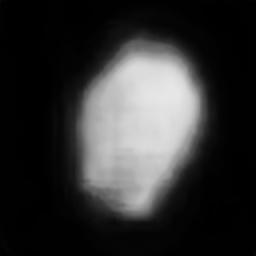

In [35]:
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
imshow(results[3]*255)


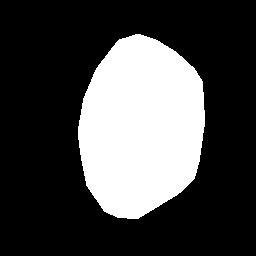

In [36]:
imshow(tr.data['test_masks'][3]*255)

In [43]:
jaccard_index(tr.data['test_masks'][3], results[3])


tf.Tensor(-39, shape=(), dtype=int8)
intersection: tf.Tensor(91, shape=(), dtype=int8) union: tf.Tensor(-39, shape=(), dtype=int8)


<tf.Tensor: shape=(), dtype=float32, numpy=-2.3333333>

In [96]:

d = tr.data['test_masks'][3] > 0.5
r = results[3]*255
t, r = cv2.threshold( np.array(r, dtype='uint8'), 0, 255, cv2.THRESH_OTSU)
r = r / 255
r = r > 0.5

r = r.flatten()
d = d.flatten()

inter = np.logical_and(d,r).sum()
union = np.logical_or(d,r).sum()
print(f'inter {inter}, union {union}, iou {inter/union}')

inter 15233, union 18144, iou 0.8395612874779541


In [89]:
r.flatten().sum()

15240

In [91]:
d.flatten().sum()

18137

In [95]:
np.logical_and(d.flatten(),r.flatten()).sum()

15233